##Prática nearest centroid classifier
1 - Utilizando o arquivo L05c_nearest centroid scratch.ipynb crie seu próprio objeto Nearest Centroid (arquivo no github)


1.1 - No arquivo tem 2 seções

1.2 - A primeira usa o pacote sklearn, para vcs observarem como deverá ser a saída correta

1.3 - A segunda seção "Implementation from scratch" contém um inicio de um classe python. Vcs deverão modificar essa classe para criar seu próprio classificador. Vejam que vcs devem implementar as funções fit() e predict()

1.4 - Comentem o código e enviem na forma de compartilhamento de link

   --- não esquecer de dar acesso de leitura para os que tiverem o link




- Os slides e demais materiais podem ser baixados dá página do git em https://github.com/dalcimar/MA28CP-Intro-to-Machine-Learning

# **L05c - Nearest Centroid**
### **Implementation from sklearn**


In [ ]:
from sklearn.neighbors import NearestCentroid
import numpy as np

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])

In [ ]:
cn_model = NearestCentroid(metric='euclidean')
cn_model.fit(X_train, y_train)

cn_model.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

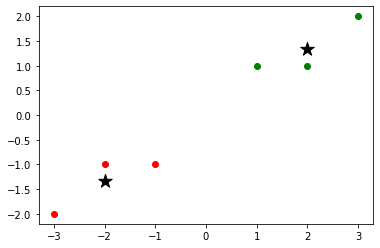

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

In [ ]:
y_pred = cn_model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

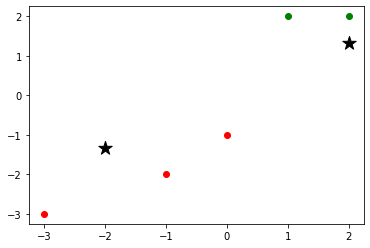

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

# **Implementation from scratch** 



######Função **Fit**
* Armazena os rótulos, retorna a média e armazena em um array 

#####Função **Predict**
* Calcula e armazena a menor distância Euclidiana em um array

#####Função **Score**
* Calcula o acerto do teste


In [ ]:
from scipy.spatial import distance
class NearestCentroidScratch():
  def __init__(self, metric='eucledian'):
    self.metric = metric
    self.target_ = np.array([])
    self.centroids_ = np.array([])
  
  def fit(self, X, y):
    self.target_ = np.unique(y)
    c = [np.mean(X[y==i], axis=0) for i in self.target_]
    self.centroids_ = np.vstack((c))
    #print(self.centroids_)

  def predict(self, X): 
    self.predict_ = np.array([], dtype=int)   
    for i in X:                                               
      dist = []
      [dist.append(distance.euclidean(i, self.centroids_[j,:])) for j in range(len(self.target_))] 
      self.predict_ = np.hstack((self.predict_, self.target_[dist.index(np.min(dist))])) 
      #print(self.predict_) 
    return self.predict_

  def score(self, x,y):
    x1 = np.sum(y)
    x2 = np.sum(x)
    self.score_ = x1/x2
    return self.score_

In [ ]:
import numpy as np

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([1, 1, 1, 2, 2, 2])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([1, 1, 1, 2, 2])

* Chamando a função NearestCentroisScratch
* Obtendo a média

In [ ]:
clf = NearestCentroidScratch()
clf.fit(X_train, y_train)

clf.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

######Plotando o gráfico

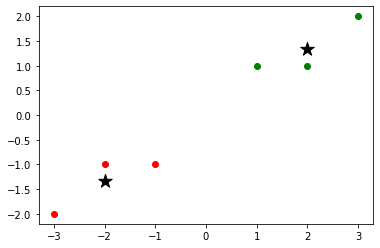

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], c='g')

plt.scatter(clf.centroids_[:,0], clf.centroids_ [:,1], s=200, marker='*', c='k')

Calculando a predição com a função **predict**

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

[1 1 1 2 2]
[1 1 1 2 2]


Calculando o acerto com a função **score**

In [ ]:
clf.score(y_test, y_pred)

1.0